# Purpose

Convert RGBA PNG image to a grayscale PNG image.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# Get test image and look at Pillow and numpy image information

In [2]:
test_file = Path("images") / "out0099_RGBA.png"

pil_img = Image.open(test_file)
print("PIL info")
print("size:", pil_img.size)
print("mode:", pil_img.mode)
print("")

np_img = np.array(pil_img)
print("numpy array info")
print("shape:", np_img.shape)
print("dtype:", np_img.dtype)
print("min, max:", np.min(np_img), np.max(np_img))

PIL info
size: (1280, 800)
mode: RGBA

numpy array info
shape: (800, 1280, 4)
dtype: uint8
min, max: 0 255


# Plots

## Pillow

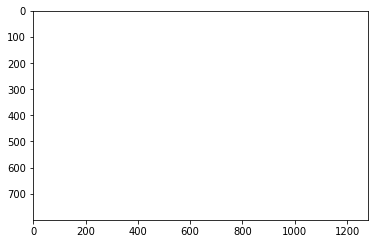

In [11]:
fig, ax = plt.subplots()
ax.imshow(pil_img, cmap="gray", interpolation=None, vmin=0, vmax=255);

## Numpy array

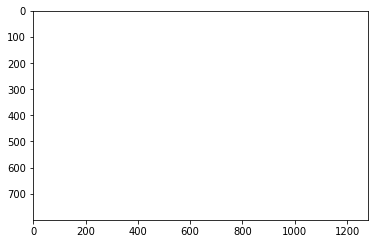

In [4]:
fig, ax = plt.subplots()
ax.imshow(np_img, cmap="gray", interpolation=None, vmin=0, vmax=255);

## Individual numpy layers for R,G,B,A

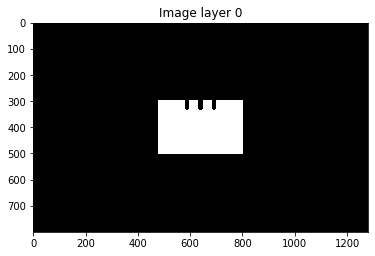

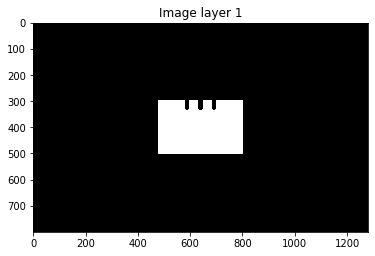

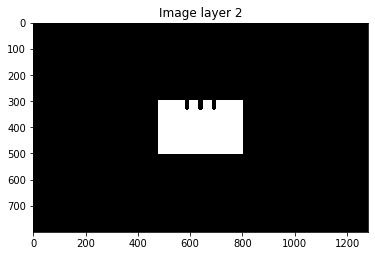

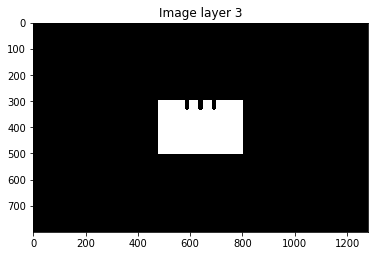

In [5]:
for i in range(4):
    fig, ax = plt.subplots()
    ax.imshow(np_img[:,:,i], cmap="gray", interpolation=None, vmin=0, vmax=255)
    ax.set_title(f"Image layer {i}");

In [6]:
np_img[400, 600]

array([255, 255, 255, 255], dtype=uint8)

# Convert

Just use the first (R) layer.

PIL info
size: (1280, 800)
mode: L



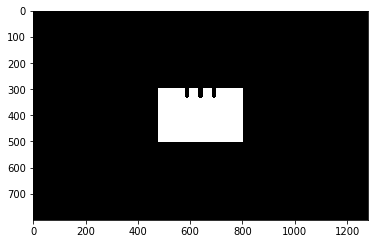

In [10]:
new_img = Image.fromarray(np_img[:,:,0])

print("PIL info")
print("size:", new_img.size)
print("mode:", new_img.mode)
print("")

fig, ax = plt.subplots()
ax.imshow(new_img, cmap="gray", interpolation=None, vmin=0, vmax=255);

For information about Pillow image modes, see [documentation](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes):

    The mode of an image defines the type and depth of a pixel in the image. Each pixel uses the full range of the bit depth. So a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on. The current release supports the following standard modes:

        1 (1-bit pixels, black and white, stored with one pixel per byte)
        L (8-bit pixels, black and white)
        P (8-bit pixels, mapped to any other mode using a color palette)
        RGB (3x8-bit pixels, true color)
        RGBA (4x8-bit pixels, true color with transparency mask)
        CMYK (4x8-bit pixels, color separation)
        YCbCr (3x8-bit pixels, color video format)
            Note that this refers to the JPEG, and not the ITU-R BT.2020, standard
        LAB (3x8-bit pixels, the L*a*b color space)
        HSV (3x8-bit pixels, Hue, Saturation, Value color space)
        I (32-bit signed integer pixels)
        F (32-bit floating point pixels)
